In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [110]:
insurance_dataset=pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
insurance_dataset.shape

(1338, 7)

In [112]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



**Categorical features: 1) Sex 2) Smoker 3) Region**


In [113]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Data Analysis**

In [114]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_55/215121745.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


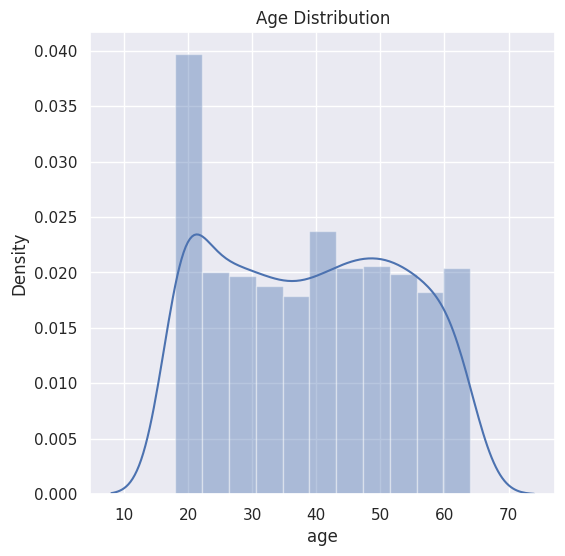

In [115]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

/tmp/ipykernel_55/1739196766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=insurance_dataset,palette='Set2')


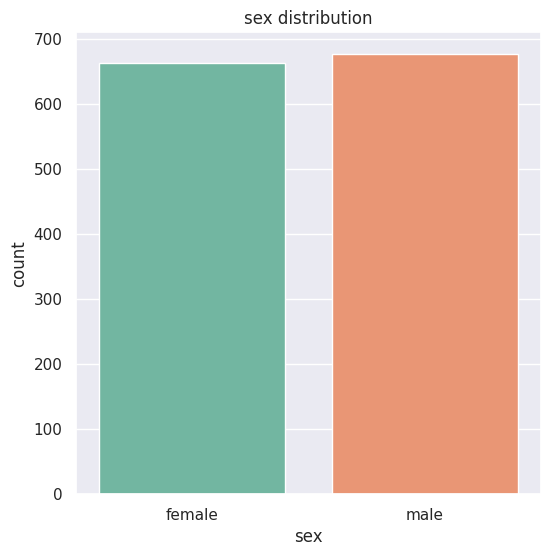

In [116]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset,palette='Set2')
plt.title('sex distribution')
plt.show()

In [117]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_55/2397278931.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


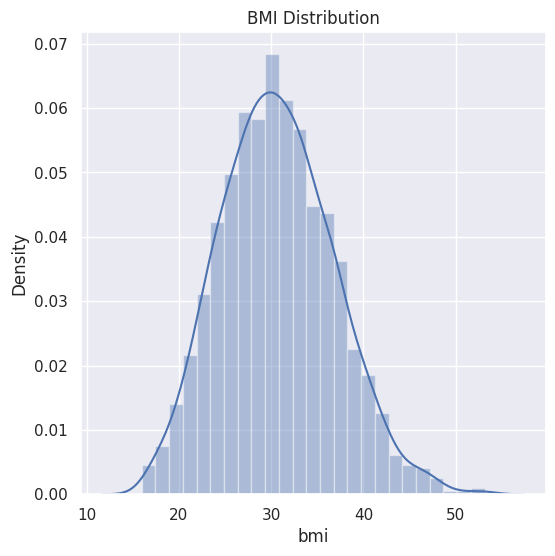

In [118]:
# BMI column
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [119]:
# Normal BMI range --> 18.5 to 24.9

/tmp/ipykernel_55/381327247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=insurance_dataset,palette='Set2')


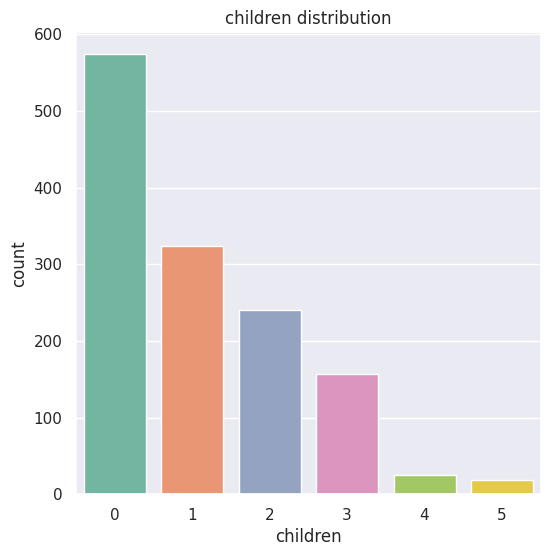

In [120]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset,palette='Set2')
plt.title('children distribution')
plt.show()

In [121]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

/tmp/ipykernel_55/1434513171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker',data=insurance_dataset,palette='Set2')


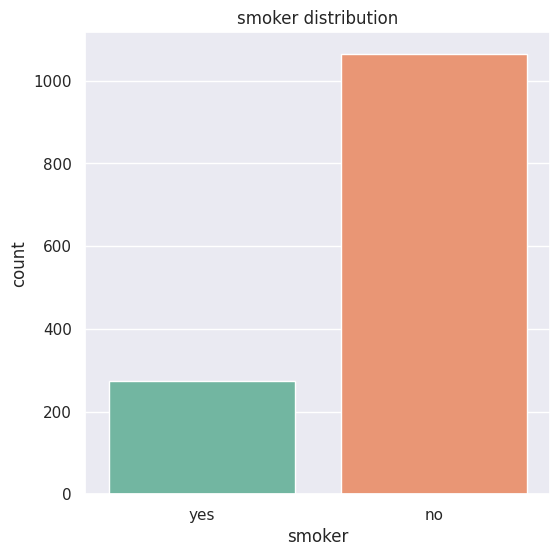

In [122]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset,palette='Set2')
plt.title('smoker distribution')
plt.show()

In [123]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

/tmp/ipykernel_55/1605851159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=insurance_dataset,palette='Set2')


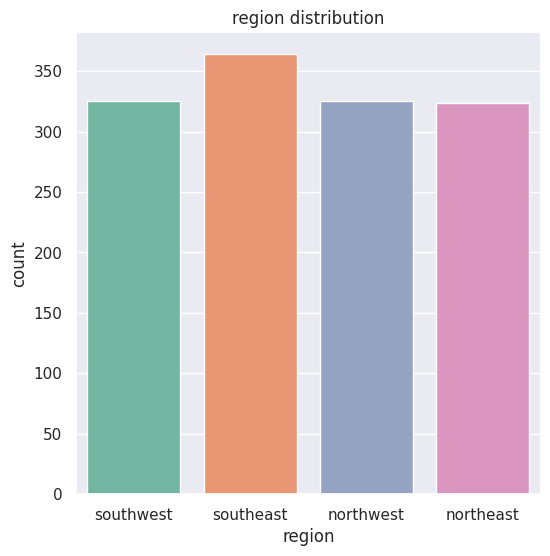

In [124]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset,palette='Set2')
plt.title('region distribution')
plt.show()

In [125]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_55/1900888390.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


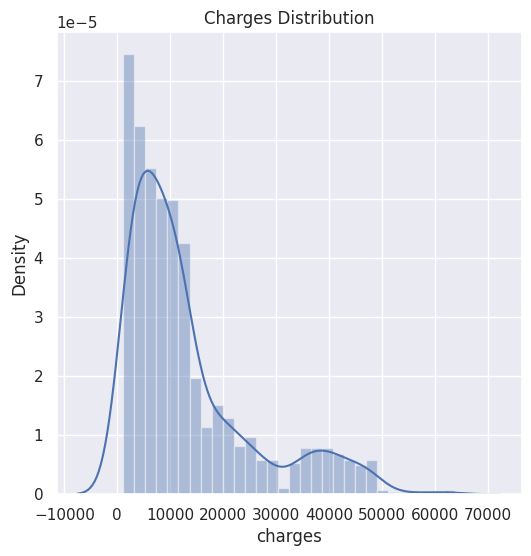

In [126]:
# charges column
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# **Data Preprocessing**

In [127]:
# Encoding categorical features

# Label encoding
from sklearn.preprocessing import LabelEncoder

cols = ['sex', 'smoker', 'region']

le = LabelEncoder()
for col in cols:
    insurance_dataset[col] = le.fit_transform(insurance_dataset[col])

In [128]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [129]:
'''If want to do manually then can code like this:

# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
'''

"If want to do manually then can code like this:\n\n# encoding sex column\ninsurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)\n\n# encoding 'smoker' column\ninsurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)\n\n# encoding 'region' column\ninsurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)\n"

In [130]:
x=insurance_dataset.iloc[:,0:6]
'''Can also do like:
x=insurance_dataset.drop(columns='charges',axis=1)
'''
y=insurance_dataset['charges']

print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [131]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [132]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# **Model Training**

In [133]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# **Model evaluation**

In [134]:
# Prediction on training data

x_pred=lr.predict(x_train)
print(r2_score(y_train,x_pred))


0.7417049283233981


In [135]:
# Prediction on testing data

y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.7833463107364539


# **Building a predictive system**

In [136]:
input_data = (31,1,25.74,0,1,0)

input_data_numpy=np.asarray(input_data)

input_data_reshaped=input_data_numpy.reshape(1,-1)

prediction=lr.predict(input_data_reshaped)
print(prediction)

print('The Insurance Cost in USD is : ',prediction[0]) 

[28294.17982329]
The Insurance Cost in USD is :  28294.179823294275


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
